# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">⚠️❤️ Risk Factors for Heart Disease on AI-Generated Data ❤️⚠️</div>

# Contents
1. [About Notebook and Dataset](#contents_1)
2. [AI's Data Creation Process](#contents_2)
3. [Data Import and Review](#contents_3)
    * [Load and Preview Raw Data](#contents_3_1)
    * [Display Data Types](#contents_3_2)
    * [Check Data for Missing Values](#contents_3_3)
    * [Display Unique Values of Qualitative Variables](#contents_3_4)
4. [Exploratory Data Analysis](#contents_4)
    * [Descriptive Statistics for Age, Resting Blood Presure and Serum Cholesterol in Respect to Sex](#contents_4_1)
    * [Distributions of Age, Resting Blood Presure and Serum Cholesterol in Respect to Sex](#contents_4_2)
    * [Observation Frequencies for Levels of Qualitative Variables by Sex](#contents_4_3)
    * [Descriptive Statistics for Age, Serum Cholesterol and Resting Blood Pressure in Respect to Heart Disease Diagnosis](#contents_4_4)
    * [Scatterings of Heart Disease Diagnoses According to Age, Serum Cholesterol and Resting Blood Pressure](#contents_4_5)
5. [Statistical Inference](#contents_5)
    * [Examining the Potential Associations Between Sex and Other Qualitative Variables](#contents_5_1)
6. [Modeling](#contents_6)
    * [Predictions About the Risk of Heart Disease Based on Age + Serum Cholesterol and Age + Resting Blood Pressure](#contents_6_1)
    * [Predictions About the Risk of Heart Disease Based on Age + Serum Cholesterol + Resting Blood Pressure](#contents_6_1)
7. [Summary](#contents_7)


# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">About Notebook and Dataset</div><a id='contents_1'></a>

This notebook aims to demonstrate the basics of data preprocessing and exploratory data analysis using the Python programming language on a dataset generated by ChatGPT artificial intelligence. 

The generated data contains 7 columns and 540 records. These columns are:

0️ **id**: record numbers<br>
1️ **age**: age of imaginary respondents<br>
2️ **sex**: biological sex of imaginary respondents<br>
3️ **chest_pain_type**: reported type of chest pain<br>
4️ **resting_blood_presure**: heart rate measured at rest (mmHg)<br>
5️ **serum_cholesterol**: serum cholesterol level (mm/dL)<br>
6️ **fasting_blood_sugar**: fasting blood sugar/glucose; zero indicates a level in the normal range (up to 100 mg/dL); one indicates a level above normal<br>
7️ **heart_disease_diagnosis**: diagnosis of any heart disease (Yes) or none (No)<br>

# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">AI's Data Creation Process</div><a id='contents_2'></a>

To generate the data, the ChatGPT query presented below was repeated until more than 500 records were generated. The generated data was dumped into a spreadsheet, then saved as a CSV file (*data_heartdisease.csv*), and uploaded to Kaggle as <a href='https://www.kaggle.com/datasets/danetykpl/risk-factors-for-heart-disease'>⚠️❤️ Risk Factors for Heart Disease Data by AI</a>.

![notebook_1.png](materials/risk_factors_for_heart_disease_notebook_1.png)
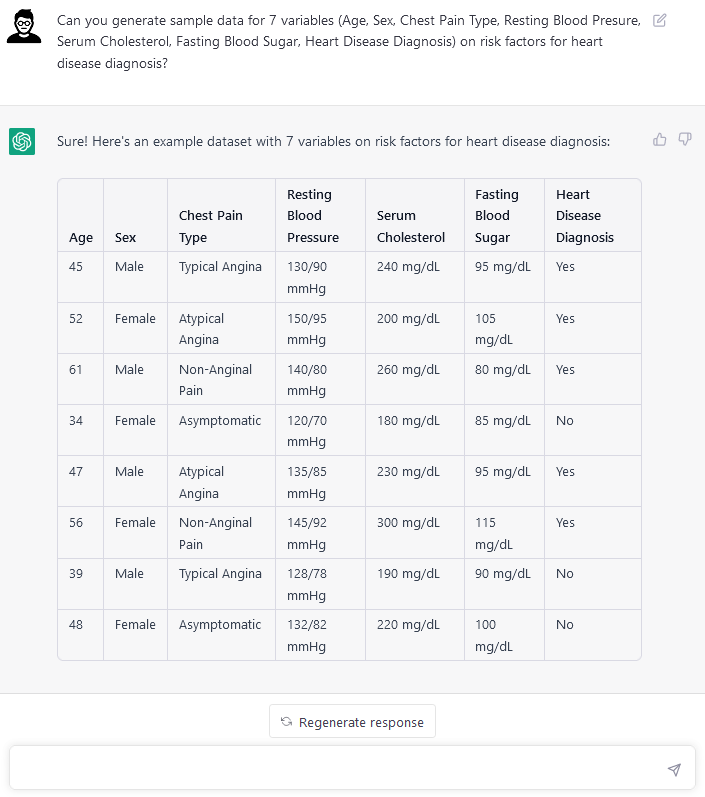

⚠️ ChatGPT, while not the best choice when it comes to reliably assisting in what are the more essential tasks in data science (yet), it has to be said that it does a pretty good job of generating made-up data. It does it so well, in fact, that we should start thinking seriously about how to control whether the data we are working on is real or perhaps made-up by AI. The problem is that at first glance it can be difficult (if at all) to tell whether we are dealing with real data or AI-generated data.


# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">Data Import and Review</div><a id='contents_3'></a>


## Load and Preview Raw Data <a id='contents_3_1'></a>

In [2]:
# Import of necessary packages
import pandas as pd
import missingno as miss

# Data loading
df = pd.read_csv('data/data_heartdisease.csv', index_col='id')

# Data preview
df.head(n=10)

,age,sex,chest_pain_type,resting_blood_presure,serum_cholesterol,fasting_blood_sugar,heart_disease_diagnosis
id,,,,,,,
1,47,Female,Non-Anginal Pain,128,245,0,No
2,62,Male,Typical Angina,130,267,1,Yes
3,58,Female,Atypical Angina,110,217,0,No
4,44,Male,Asymptomatic,140,235,0,Yes
5,50,Female,Non-Anginal Pain,140,263,0,No
6,66,Male,Asymptomatic,120,338,0,Yes
7,52,Female,Atypical Angina,120,243,1,Yes
8,58,Male,Non-Anginal Pain,150,220,0,No
9,42,Male,Atypical Angina,140,226,0,No


## Display Data Types <a id='contents_3_2'></a>

In [3]:
# Datatypes preview
df.dtypes

age                         int64
sex                        object
chest_pain_type            object
resting_blood_presure       int64
serum_cholesterol           int64
fasting_blood_sugar         int64
heart_disease_diagnosis    object
dtype: object

**Findings:**<br>
✅ Variables `age`, `resting_blood_presure`, `serum_cholesterol`, and `fasting_blood_sugar` are numerical.<br>
✅ Variables `sex`, `chest_pain_type`, and `heart_disease_diagnosis` are textual. <br>

## Check Data for Missing Values <a id='contents_3_3'></a>

<Axes: >

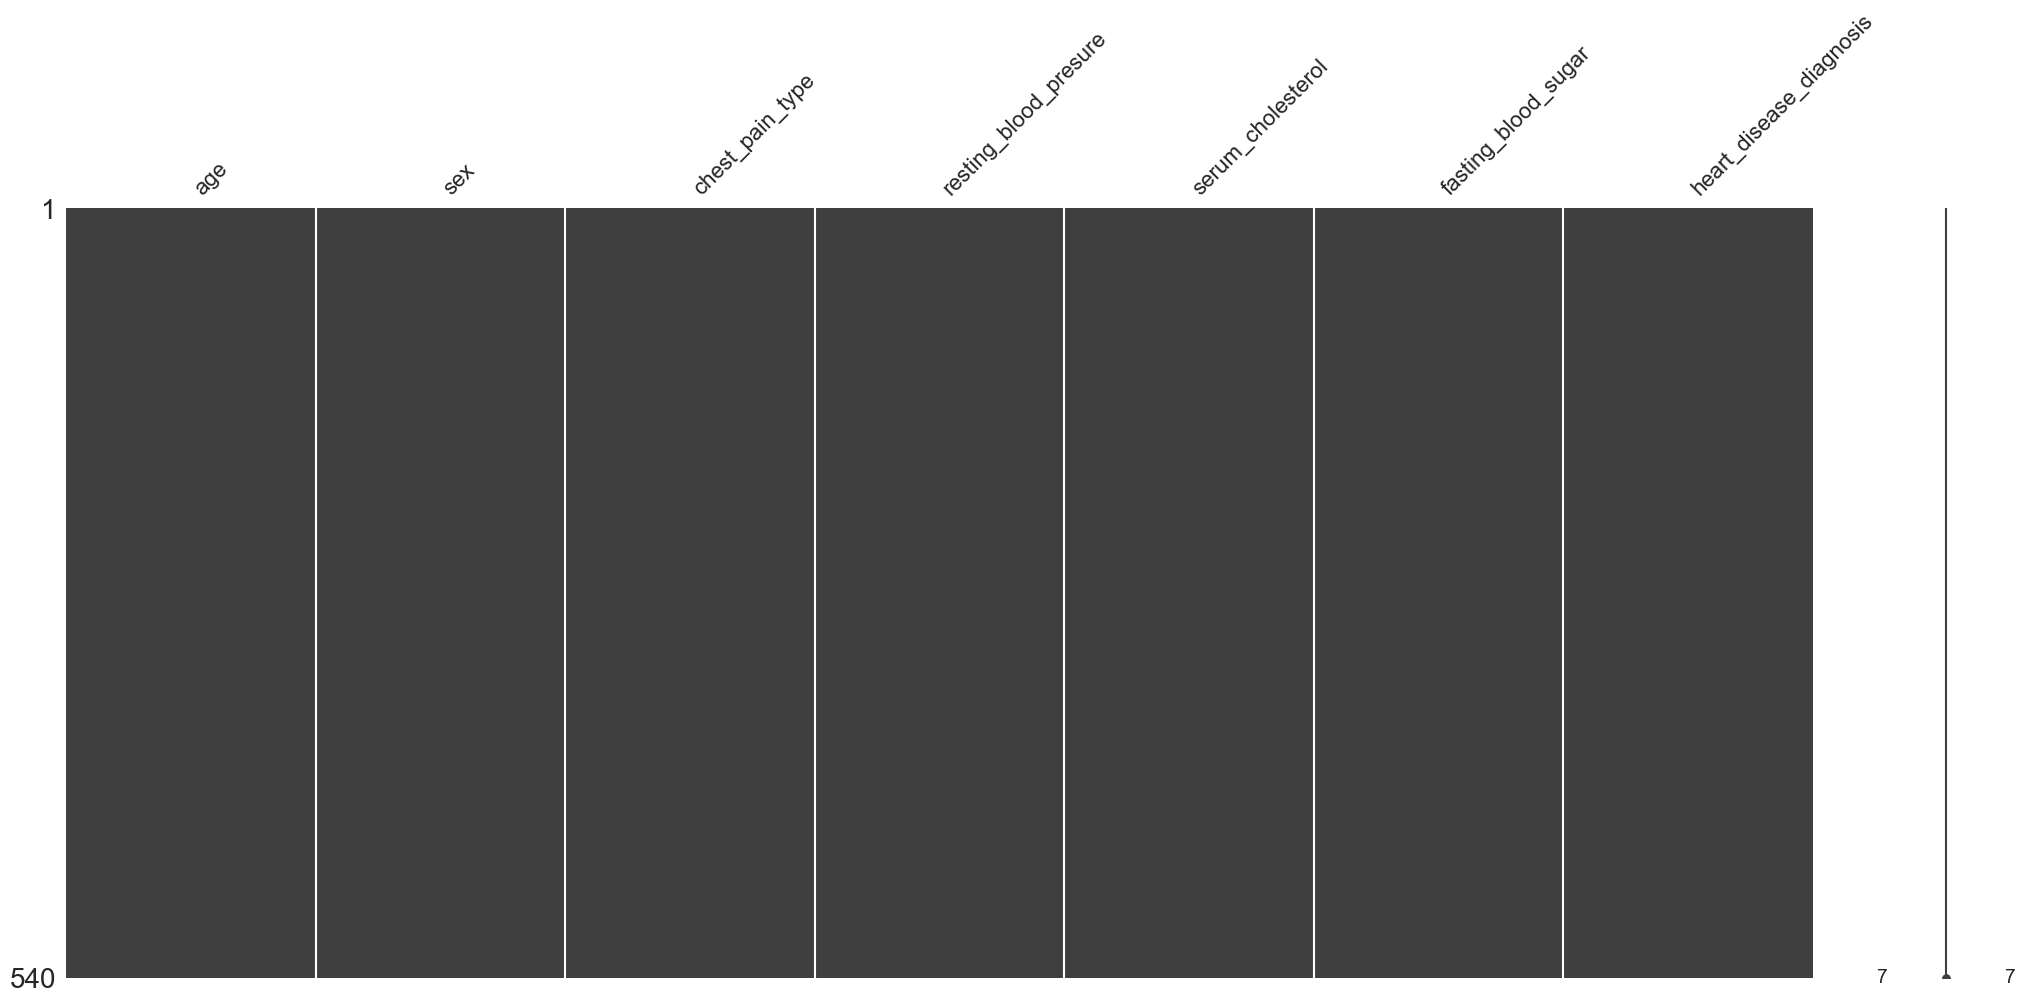

In [4]:
# Check data for missing values
miss.matrix(df)

**Findings:**<br>
✅ There are no missing data in the data set. <br>

## Display Unique Values of Qualitative Variables <a id='contents_3_4'></a>

In [5]:
for col in df:
    if (df[col].dtype == 'object') or (len(df[col].unique()) < 10):
        print(f'{col}', df[col].unique())

sex ['Female' 'Male']
chest_pain_type ['Non-Anginal Pain' 'Typical Angina' 'Atypical Angina' 'Asymptomatic']
fasting_blood_sugar [0 1]
heart_disease_diagnosis ['No' 'Yes']


# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">Exploratory Data Analysis</div><a id='contents_4'></a>


## Descriptive Statistics for Age, Resting Blood Presure and Serum Cholesterol in Respect to Sex <a id='contents_4_1'></a>

In [6]:
# Import of necessary packages
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into males and females (based on 'sex' column).
df_m = df[df['sex'] == 'Male']
df_f = df[df['sex'] == 'Female']

# Set the format for displaying results by describe function.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# View results.
print("===> Males")
print(df_m.loc[:, df_m.columns != 'fasting_blood_sugar'].describe())
print("\n===> Females")
print(df_f.loc[:, df_f.columns != 'fasting_blood_sugar'].describe(), '\n')

===> Males
         age  resting_blood_presure  serum_cholesterol
count 271.00                 271.00             271.00
mean   53.14                 130.21             246.23
std     6.34                  10.13              34.86
min    40.00                 105.00             141.00
25%    49.00                 120.00             223.00
50%    54.00                 130.00             239.00
75%    58.00                 138.00             263.00
max    67.00                 170.00             354.00

===> Females
         age  resting_blood_presure  serum_cholesterol
count 269.00                 269.00             269.00
mean   53.10                 130.68             250.24
std     6.36                  11.93              43.12
min    39.00                 105.00             149.00
25%    48.00                 120.00             221.00
50%    53.00                 130.00             244.00
75%    58.00                 140.00             270.00
max    68.00                 170.00     

**Findings:**<br>
✅ The number of observations for both sexes are almost equal ($N_{Males}=271$; $N_{Females}=269$). <br>
✅ The average `age` for both sexes is almost equal ($M_{Males}=53.14$; $M_{Females}=53.10$). <br>
✅ The average `resting_blood_presure` for both sexes is almost equal ($M_{Males}=130.21$; $M_{Females}=130.68$). <br>
✅ The average `serum_cholesterol` for females is slightly higher ($M_{Males}=246.23$; $M_{Females}=250.24$). <br>

## Distributions of Age, Resting Blood Presure and Serum Cholesterol in Respect to Sex <a id='contents_4_2'></a>

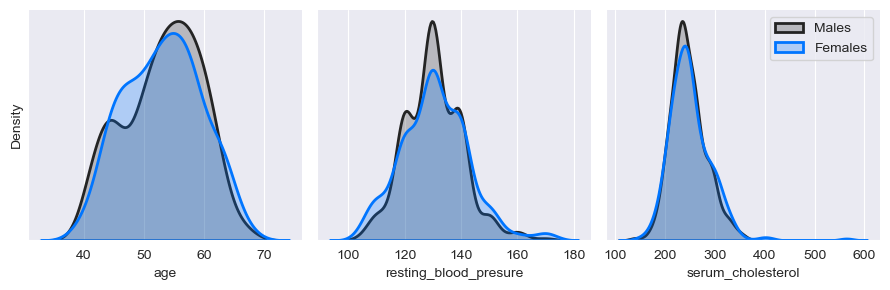

In [7]:
# Define a grid row for charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

# Define params for charts
cls = {'Male': '#242424', 'Female': '#0075FF'}
pms = {'fill': True, 'lw': 2}
vs = ['age', 'resting_blood_presure', 'serum_cholesterol']

for a, v in zip(axes, vs):
    sns.kdeplot(data=df_m, x=v, fill=pms['fill'], linewidth=pms['lw'], color=cls['Male'], ax=a)
    sns.kdeplot(data=df_f, x=v, fill=pms['fill'], linewidth=pms['lw'], color=cls['Female'], ax=a)
    a.set_yticks([])
    a.set_yticklabels([])
    if v != 'age':
        a.set_ylabel('')
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

# Add legend and adjust layout
plt.legend(('Males','Females'), loc=0)
plt.tight_layout()

**Findings:**<br>
✅ The distributions of observation counts by sex do not differ at first glance for the variables `age`, `blood_rest` and `serum_cholesterol`. <br>
✅ The distribution of the `age` variable appears to be most similar to a normal distribution. <br>
✅ The distributions of the `resting_blood_presure` and `serum_cholesterol` variables appear to have positive skewness values indicating that they are right-skewed. This means that the median is lower than the average.

## Observation Frequencies for Levels of Qualitative Variables by Sex <a id='contents_4_3'></a>

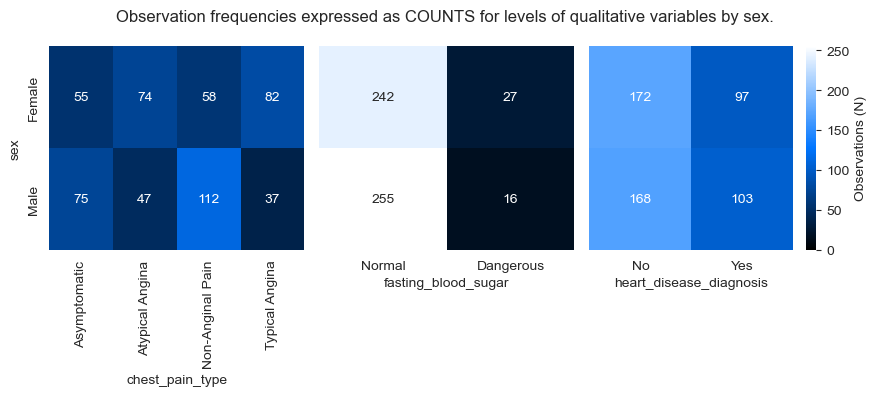

In [8]:
# Import of necessary packages
import matplotlib

# Create contingency (cross) tables
cs_cpt = pd.crosstab(index=df['sex'], columns=df['chest_pain_type'])
cs_fbs = pd.crosstab(index=df['sex'], columns=df['fasting_blood_sugar'])
cs_hdd = pd.crosstab(index=df['sex'], columns=df['heart_disease_diagnosis'])
cs = [cs_cpt, cs_fbs, cs_hdd]

# Define a grid row for charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
fig.suptitle('Observation frequencies expressed as COUNTS for levels of qualitative variables by sex.')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "#0075FF", "white"])
vmin, vmax = 0, cs_fbs.values.max()

# # Plot cross tables
for i, (ax, c) in enumerate(zip(axes, cs)):
    kwargs = dict(vmin=vmin, vmax=vmax, cmap=cmap, annot=True, fmt='.0f', robust=True, ax=ax)
    if i == 0:
        sns.heatmap(c, cbar=False, **kwargs)
    elif i >= 1:
        if i == 1:
            sns.heatmap(c, cbar=False, **kwargs)
            ax.set_xticklabels(['Normal', 'Dangerous'])
        else:
            sns.heatmap(c, cbar_kws={'label': 'Observations (N)'}, **kwargs)
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel('')

plt.tight_layout()

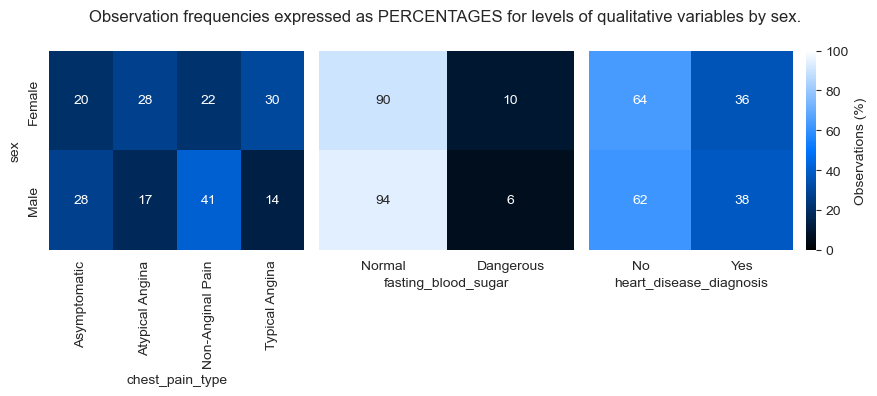

In [9]:
# Define a grid row for charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
fig.suptitle('Observation frequencies expressed as PERCENTAGES for levels of qualitative variables by sex.')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "#0075FF", "white"])
vmin, vmax = 0, 100

# # Plot cross tables
for i, (ax, c) in enumerate(zip(axes, cs)):
    c = c.apply(lambda r: (r / r.sum()) * 100.0, axis=1) # Convert counts to percentages sex-wise.
    kwargs = dict(vmin=vmin, vmax=vmax, cmap=cmap, annot=True, fmt='.0f', robust=True, ax=ax)
    if i == 0:
        sns.heatmap(c, cbar=False, **kwargs)
    elif i >= 1:
        if i == 1:
            sns.heatmap(c, cbar=False, **kwargs)
            ax.set_xticklabels(['Normal', 'Dangerous'])
        else:
            sns.heatmap(c, cbar_kws={'label': 'Observations (%)'}, **kwargs)
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel('')

plt.tight_layout()

**Findings:**<br>
✅ Only for the variable `chest_pain_type` do the observation frequencies appear to differ between sex at first glance. <br>
🤔 A [chi-square test of independence](#contents_5_1) can be used to verify the existence of a potential association between the variable `sex` and `chest_pain_type`.

## Descriptive Statistics for Age, Serum Cholesterol and Resting Blood Pressure in Respect to Heart Disease Diagnosis <a id='contents_4_4'></a>

In [10]:
# Generate descriptive statistics.
df_y = df[df['heart_disease_diagnosis'] == 'Yes']
df_n = df[df['heart_disease_diagnosis'] == 'No']
vars = ['age', 'serum_cholesterol', 'resting_blood_presure']

print("===> Heart Disease: YES")
print(df_y.loc[:, vars].describe())
print("\n===> Heart Disease: NO")
print(df_n.loc[:, vars].describe(), '\n')

===> Heart Disease: YES
         age  serum_cholesterol  resting_blood_presure
count 200.00             200.00                 200.00
mean   56.60             273.36                 134.49
std     5.70              43.49                  11.47
min    41.00             166.00                 108.00
25%    54.00             245.00                 130.00
50%    57.00             272.00                 130.00
75%    61.00             294.25                 140.00
max    68.00             564.00                 170.00

===> Heart Disease: NO
         age  serum_cholesterol  resting_blood_presure
count 340.00             340.00                 340.00
mean   51.07             233.44                 128.06
std     5.79              27.24                  10.09
min    39.00             141.00                 105.00
25%    46.75             216.00                 120.00
50%    51.50             234.00                 130.00
75%    55.00             247.00                 138.00
max    66.00     

## Scatterings of Heart Disease Diagnoses According to Age, Serum Cholesterol and Resting Blood Pressure <a id='contents_4_5'></a>

🤔 In the next step, using the `seaborn` package, I want to display 2x `jointplot` in one row of one figure. The package, unfortunately, does not allow this, so we need a simple class to make this possible.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Based on the answer provided on StackOverflow: https://stackoverflow.com/a/47664533/6772094
class SeabornJointPlotOnGrid:
    
    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec

        if isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()

        self._finalize()
        
    def _movejointgrid(self):
        h = self.sg.ax_joint.get_position().height
        h2 = self.sg.ax_marg_x.get_position().height
        
        r = int(np.round(h / h2))
        
        self._resize()
        
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r + 1,r + 1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])
    
    def _moveaxes(self, ax, gs):
        ax.remove()
        ax.figure = self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

🎉 Now we can finally move on to display what we want to display :)

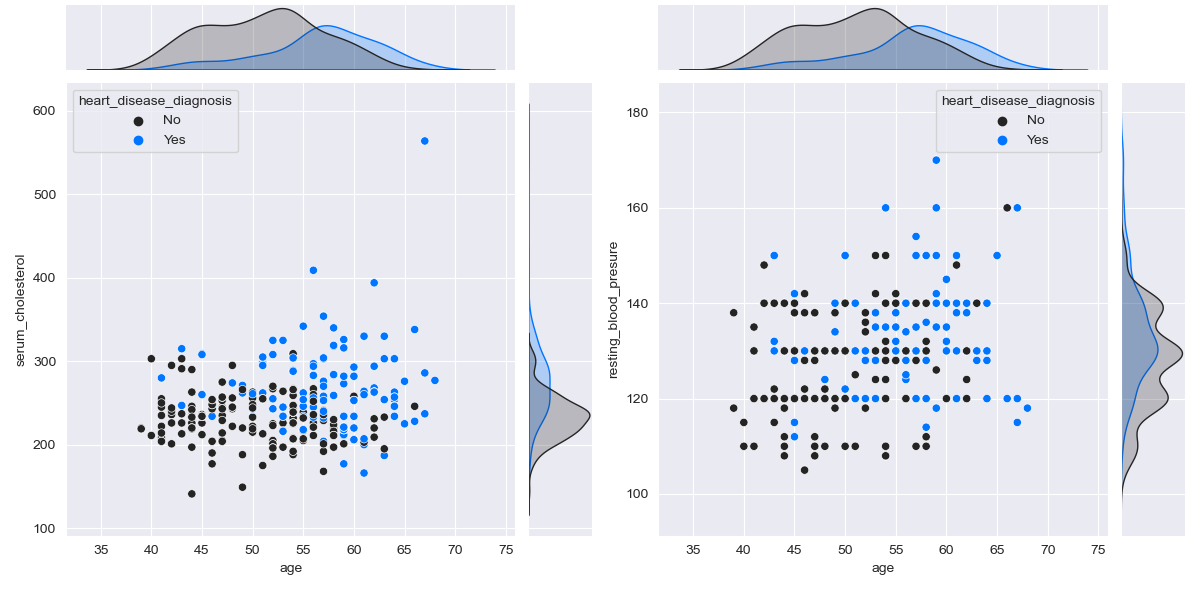

In [14]:
import numpy as np

# Generate jointplots and place them on a common figure using a custom class.
fig = plt.figure(figsize=(12, 6))

gs = gridspec.GridSpec(1, 2)

g1 = sns.jointplot(
    data=df,
    x='age',
    y='serum_cholesterol',
    hue='heart_disease_diagnosis',
    kind='scatter',
    palette=['#242424', '#0075FF']
)

g2 = sns.jointplot(
    data=df,
    x='age',
    y='resting_blood_presure',
    hue='heart_disease_diagnosis',
    kind='scatter',
    palette=['#242424', '#0075FF']
)

mg1 = SeabornJointPlotOnGrid(g1, fig, gs[0])
mg2 = SeabornJointPlotOnGrid(g2, fig, gs[1])

gs.tight_layout(fig)

**Findings:**<br>
✅ The number of people diagnosed with heart disease is lower than the number of people who have not been diagnosed. ($N_{Yes}=200$; $N_{No}=340$). <br>
✅ People diagnosed with heart disease are older ($M_{Yes}=56.60$; $M_{No}=51.07$). <br>
✅ People diagnosed with heart disease have higher cholesterol levels ($M_{Yes}=273.36$; $M_{No}=233.44$). <br>
✅ People diagnosed with heart disease have higher resting blood pressure ($M_{Yes}=134.49$; $M_{Females}=128.06$). <br>
🤔 The [logistic regression model](#contents_6_1) can be used to make predictions about the risk of heart disease based on age, cholesterol levels and resting blood pressure.

# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">Statistical Inference</div><a id='contents_5'></a> 

## Examining the Potential Associations Between Sex and Other Qualitative Variables <a id='contents_5_1'></a>

In [15]:
# Calculate the chi-square test of independence between sex and the other qualitative variables.
import scipy.stats as ss
qv = ['Chest Pain Type', 'Fasting Blood Sugar', 'Heart Disease Diagnosis']
for c, v in zip(cs, qv):
    chi2, p_value, dof, expected = ss.chi2_contingency(c, correction=False)
    if p_value < 0.05:
        p_value = str(p_value) + ' (*)'
    print(f'Sex vs {v}:')
    print(f"χ2({dof}) = {chi2}, p = {p_value}\n")
print('Mark significant association for alpha level 0.05 with asterisk (*).')

Sex vs Chest Pain Type:
χ2(3) = 43.26465043653495, p = 2.1623119758316382e-09 (*)

Sex vs Fasting Blood Sugar:
χ2(1) = 3.1466294860551614, p = 0.07608397010787225

Sex vs Heart Disease Diagnosis:
χ2(1) = 0.21965442921431155, p = 0.6393033521878453

Mark significant association for alpha level 0.05 with asterisk (*).


**Findings:**<br>
✅ There is a statistically significant association between `sex` and `chest_pain_type` ($χ^{2}(3)=43.26, p < 0.05$). <br>
✅ There are no significant associations between `sex` and `fasting_blood_sugar` ($χ^{2}(1)=3.15, p = 0.08$), as well as between `sex` and `heart_disease_diagnosis` ($χ^{2}(1)=0.22, p = 0.64$).

# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">Modeling</div><a id='contents_6'></a>

## Predictions About the Risk of Heart Disease Based on Age + Serum Cholesterol and Age + Resting Blood Pressure <a id='contents_6_1'></a>

===> Accuracy of heart_disease_diagnosis prediction based on age and serum_cholesterol
Accuracy = 0.7037 

Confusion matrix:
 [[47 12]
 [20 29]] 

True positives (TP): 29
False positives (FP): 12
False negatives (FN): 20
True negatives (TN): 47 

Precision = TP / (TP + FP) = 0.7073
Recall = TP / (TP + FN) = 0.5918 

===> Accuracy of heart_disease_diagnosis prediction based on age and resting_blood_presure
Accuracy = 0.6944 

Confusion matrix:
 [[51  8]
 [25 24]] 

True positives (TP): 24
False positives (FP): 8
False negatives (FN): 25
True negatives (TN): 51 

Precision = TP / (TP + FP) = 0.75
Recall = TP / (TP + FN) = 0.4898 



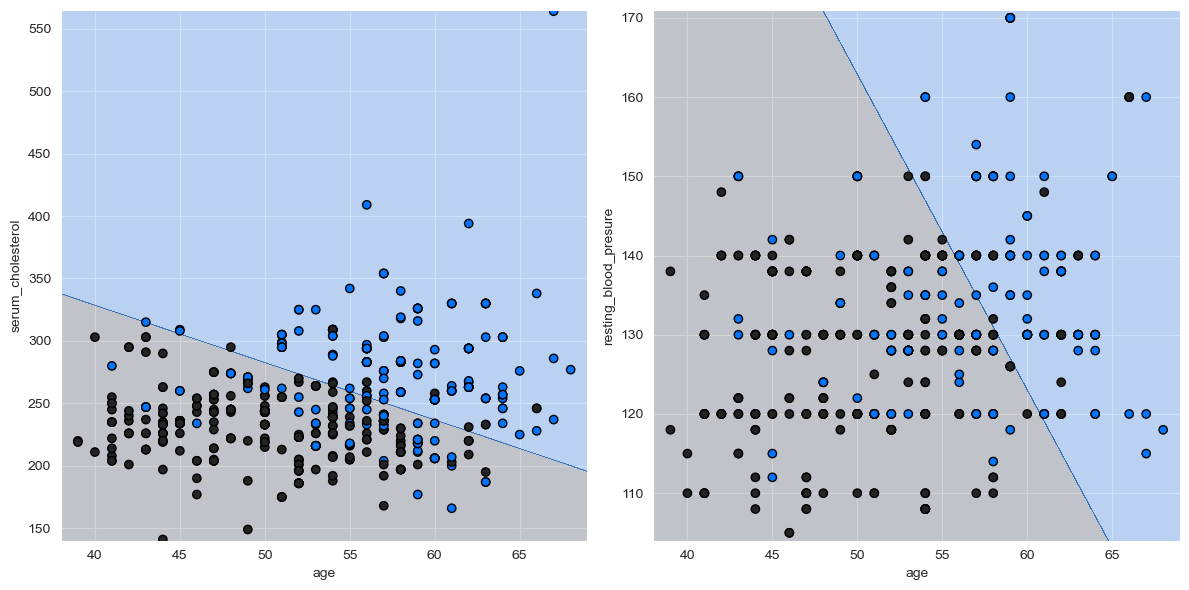

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

def model_and_plot(ind_var_1, ind_var_2, dep_var, axis):
    
    # Define the input features and target variable
    X = df[[ind_var_1, ind_var_2]]
    y = df[dep_var].replace({'Yes': 1, 'No': 0})
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create the logistic regression model
    model = LogisticRegression()
    model.fit(X_train.values, y_train.values)

    # Make predictions on the testing set
    y_pred = model.predict(X_test.values)

    # Calculate the accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    print(f"===> Accuracy of {dep_var} prediction based on {ind_var_1} and {ind_var_2}")
    print("Accuracy =", round(accuracy, 4), '\n')
    print("Confusion matrix:\n", conf_mat, '\n')
    
    print("True positives (TP):", conf_mat[1,1])
    print("False positives (FP):", conf_mat[0,1])
    print("False negatives (FN):", conf_mat[1,0])
    print("True negatives (TN):", conf_mat[0,0], '\n')
    
    print("Precision = TP / (TP + FP) =", round(conf_mat[1,1] / (conf_mat[1,1] + conf_mat[0,1]), 4))
    print("Recall = TP / (TP + FN) =", round(conf_mat[1,1] / (conf_mat[1,1] + conf_mat[1,0]), 4), '\n')
    
    # Create a meshgrid of points to make the decision boundary plot
    xx, yy = np.meshgrid(np.arange(X[ind_var_1].min()-1, X[ind_var_1].max()+1, 0.01), np.arange(X[ind_var_2].min()-1, X[ind_var_2].max()+1, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the scatter plot
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#242424", "#0075FF"])
    
    axis.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
    axis.scatter(X[ind_var_1], X[ind_var_2], c=y.map({0: 0, 1: 1}), cmap=cmap, edgecolors='k')
    
    axis.set_xlabel(ind_var_1)
    axis.set_ylabel(ind_var_2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

model_and_plot(ind_var_1='age', ind_var_2='serum_cholesterol', dep_var='heart_disease_diagnosis', axis=axes[0])
model_and_plot(ind_var_1='age', ind_var_2='resting_blood_presure', dep_var='heart_disease_diagnosis', axis=axes[1])

plt.tight_layout()

**Findings:**<br>
✅ The logistic regression model based on `age` and `serum_cholesterol` has an accuracy of 0.7037, meaning that it correctly predicts the `heart_disease_diagnosis` 70.37% of the time. <br>
✅ The confusion matrix for this model shows that it correctly identifies 29 true positives and 47 true negatives, but has 20 false negatives and 12 false positives. <br>
✅ The precision of this model is 0.7073, indicating that out of all the positive predictions it made, 70.73% were correct. <br>
✅ The recall of this model is 0.5918, indicating that out of all the actual positives, 59.18% were correctly identified by the model. <br>
✅ The logistic regression model based on `age` and `resting_blood_presure` has an accuracy of 0.6944, meaning that it correctly predicts the `heart_disease_diagnosis` 69.44% of the time. <br>
✅ The confusion matrix for this model shows that it correctly identifies 24 true positives and 51 true negatives, but has 25 false negatives and 8 false positives. <br>
✅ The precision of this model is 0.75, indicating that out of all the positive predictions it made, 75% were correct. <br>
✅ The recall of this model is 0.4898, indicating that out of all the actual positives, 48.98% were correctly identified by the model. <br>
🤔 Based on the analysis, logistic regression models using `age` and `serum_cholesterol` or `age` and `resting_blood_presure` as predictors were able to predict `heart_disease_diagnosis` with moderate accuracy. The precision and recall scores were also moderate. However, there is room for improvement in the models' performance, as evidenced by the misclassification of a significant number of cases. Further analysis and feature engineering may be necessary to improve the models' accuracy and effectiveness in predicting heart disease diagnosis based on the independent variables used in the current analysis. <br>
🤔 We can try combining the three independent variables `age`, `serum_cholesterol` and `resting_blood_presure` into a single model to see if it significantly changes its accuracy in predicting `heart_disease_diagnosis`.


## Predictions About the Risk of Heart Disease Based on Age + Serum Cholesterol + Resting Blood Pressure <a id='contents_6_2'></a>

In [17]:
# Define the input features and target variable
X = df[['age', 'serum_cholesterol', 'resting_blood_presure']]
y = df['heart_disease_diagnosis'].replace({'Yes': 1, 'No': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()
model.fit(X_train.values, y_train.values)

# Make predictions on the testing set
y_pred = model.predict(X_test.values)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"===> Accuracy of heart_disease_diagnosis prediction based on age, serum_cholesterol, and resting_blood_presure")
print("Accuracy =", round(accuracy, 4), '\n')
print("Confusion matrix:\n", conf_mat, '\n')

print("True positives (TP):", conf_mat[1, 1])
print("False positives (FP):", conf_mat[0, 1])
print("False negatives (FN):", conf_mat[1, 0])
print("True negatives (TN):", conf_mat[0, 0], '\n')

print("Precision = TP / (TP + FP) =", round(conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[0, 1]), 4))
print("Recall = TP / (TP + FN) =", round(conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[1, 0]), 4), '\n')

===> Accuracy of heart_disease_diagnosis prediction based on age, serum_cholesterol, and resting_blood_presure
Accuracy = 0.7315 

Confusion matrix:
 [[47 12]
 [17 32]] 

True positives (TP): 32
False positives (FP): 12
False negatives (FN): 17
True negatives (TN): 47 

Precision = TP / (TP + FP) = 0.7273
Recall = TP / (TP + FN) = 0.6531 



**Findings:**<br>
✅ The logistic regression model based on `age`, `serum_cholesterol` and `resting_blood_presure` has an accuracy of 0.7315, meaning that it correctly predicts the `heart_disease_diagnosis` 73.15% of the time. <br>
✅ The confusion matrix for this model shows that it correctly identifies 32 true positives and 47 true negatives, but has 17 false negatives and 12 false positives. <br>
✅ The precision of this model is 0.7273, indicating that out of all the positive predictions it made, 72.73% were correct. <br>
✅ The recall of this model is 0.6531, indicating that out of all the actual positives, 65.31% were correctly identified by the model. <br>
✅ Using the three features together explains `heart_disease_diagnosis` better than each of their two combinations, by some 3%.

# <div style="text-align: center; background-color: #242424; font-family:Calibri Light; color: white; padding: 14px; line-height: 1;border-radius:20px">Summary</div><a id='contents_7'></a> 



**About the data:**<br>
✅ There are no differences between men and women on the `age`, `resting_blood_presure`, `fasting_blood_sugar` and `heart_disease_diagnosis` dimensions. <br>
✅ Women, on average, have slightly higher cholesterol levels. <br>
✅ There is a relationship between sex and the types of chest pain reported. Women were more likely to report typical and atypical anginas, while men were more likely to report non-anginal and asymptomatic pain. <br>
✅ Age, cholesterol levels and resting blood pressure are relatively good predictors for estimating the risk of heart disease. <br>

**In general:**<br>
✅ ChatGPT can be used to generate interesting exercise and test data. <br>
